In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
%matplotlib inline

# boston 데이타셋 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [108]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [37]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [38]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [39]:
b = raw_df.iloc[1::2].reset_index(drop=True)

In [40]:
a = raw_df.iloc[::2].reset_index(drop=True)

In [41]:
df = pd.concat([a,b], axis=1)

In [42]:
df

,0,1,2,3,4,5,6,7,8,9,...,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,4.98,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,9.14,21.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,4.03,34.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,2.94,33.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,5.33,36.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,...,9.67,22.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,...,9.08,20.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,...,5.64,23.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,...,6.48,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
0       0
1       0
2       0
3     506
4     506
5     506
6     506
7     506
8     506
9     506
10    506
dtype: int64

In [44]:
df2 = df.iloc[:, :14].copy()

In [45]:
df2

,0,1,2,3,4,5,6,7,8,9,10,0,1,2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [46]:
df2.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV",]

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [47]:
bostonDF = df2.copy()

In [48]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


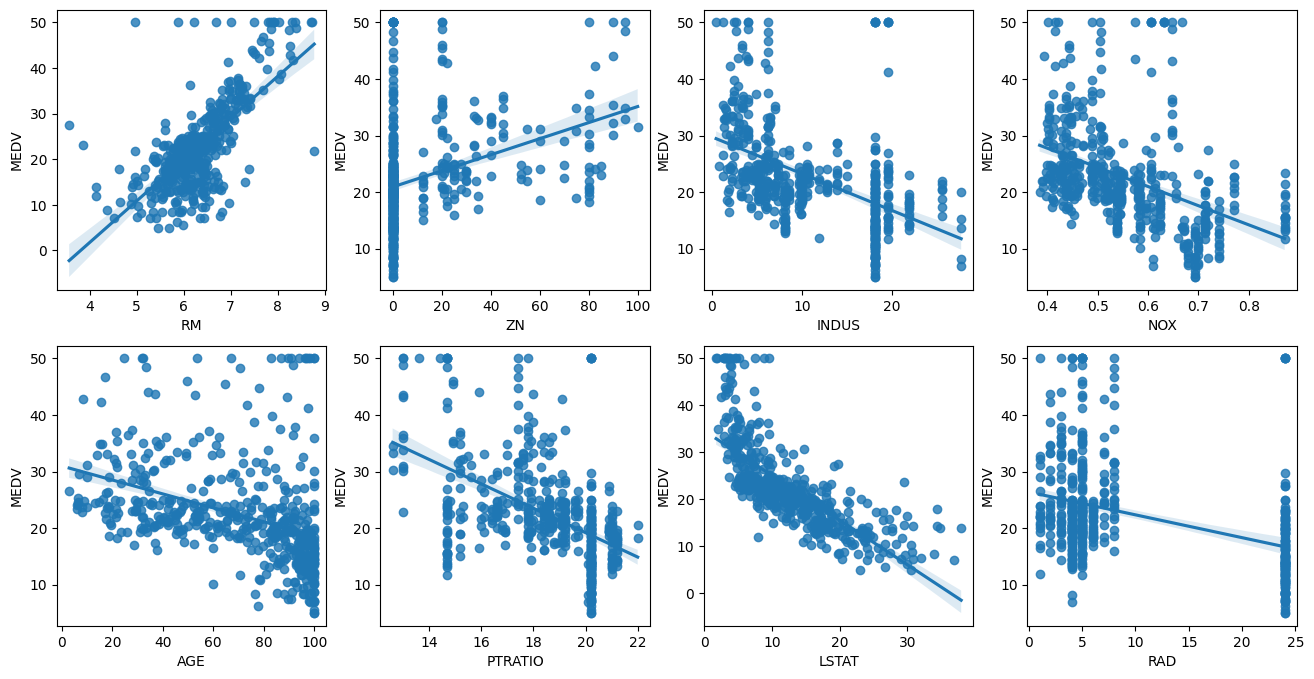

In [24]:
#y값(주택가격)에 영향을 미치는 변수를 알아보기 위해 시각화 = EDA 단계
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='MEDV',data=bostonDF , ax=axs[row][col])

fig1 = plt.gcf()
#fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
y_target = bostonDF['MEDV']
X_data = bostonDF.drop(['MEDV'], axis=1)

In [52]:

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)


In [54]:
Ir = LinearRegression()
Ir.fit(X_train, y_train)

LinearRegression()

In [56]:
y_preds = Ir.predict(X_test)

In [57]:
y_preds

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641,
       17.66341192, 30.32844101, 17.8513932 , 10.86187069, 12.83177966,
       21.18350434, 16.41212257, 28.66817527, 37.01110952, 23.42172197,
       24.56906089, 14.55434775, 11.51023436, 30.27784089, 23.48027467,
       22.86210577, 17.61623753, 21.2528808 , 17.29802868, 34.06118291,
        7.19879841, 13.39928425, 19.4234468 , 13.2423286 ,  8.3336837 ,
       29.34933073, 11.83768837, 19.84125562, 23.97623235, 16.34351261,
       13.20973749, 14.3352014 , 17.26323753, 17.37091562, 23.84644351,
       32.8390912 ,  9.3866759 , 19.06694335, -3.98840206, 19.87721947,
       21.26003361, 24.17775745, 35.35923599, 20.32415303, 28.23212889,
       32.67560962, 40.83910565, 41.19126206, 19.78588457, 25.0134137 ,
       24.13111046, 19.62715719, 33.49344219, 23.61402811, 15.31513017,
       22.70657074, 25.78436589, 23.99723589,  8.78013424, 21.81929237,
       39.68193998, 32.8907251 , 30.20417723, 14.35610647, 23.56

In [59]:
mse = mean_squared_error(y_test, y_preds)

In [60]:
mse

np.float64(17.296915907901962)

In [61]:
import numpy as np
rmse = np.sqrt(mse)

In [62]:
r2_score(y_test, y_preds)

0.7572263323138948

In [65]:
Ir.intercept_

np.float64(40.995595172164826)

In [69]:
np.round(Ir.coef_,1)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [67]:
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [71]:
ss = StandardScaler()

In [72]:
#훈련
ss.fit(X_train)

StandardScaler()

In [73]:
#훈련시킨 것을 변환하여 변수에 저장
X_train_scaler = ss.transform(X_train)

In [74]:
X_train_scaler

array([[-0.4304453 , -0.47248913, -0.62022704, ..., -0.24718777,
         0.46387473,  0.47749885],
       [-0.36428457, -0.47248913, -0.44001213, ...,  1.17081462,
         0.39743392, -0.19802441],
       [-0.38934571,  0.38339498, -1.05098464, ..., -2.48854638,
         0.36862429, -0.74997634],
       ...,
       [ 9.15501348, -0.47248913,  1.01928913, ...,  0.80487852,
        -3.78442909,  1.08437137],
       [-0.4565524 ,  3.59296038, -1.23999053, ..., -1.71093217,
         0.39296731, -1.3513568 ],
       [-0.44313799, -0.47248913, -0.62022704, ..., -0.24718777,
         0.38001414, -0.43555596]])

In [77]:
import pandas as pd
pd.DataFrame(X_train_scaler).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02
mean,5.017957e-18,2.383530e-17,-1.003591e-17,1.003591e-17,-1.649653e-16,5.017957e-17,-4.767059e-17,-1.379938e-16,1.003591e-17,6.021549e-17,4.315443e-16,-1.430118e-16,-9.534119e-17
std,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00
min,-4.579945e-01,-4.724891e-01,-1.565256e+00,-2.574200e-01,-1.432426e+00,-3.735182e+00,-2.346055e+00,-1.274921e+00,-9.955552e-01,-1.307353e+00,-2.671514e+00,-3.939085e+00,-1.509253e+00
25%,-4.480112e-01,-4.724891e-01,-8.722349e-01,-2.574200e-01,-8.874164e-01,-5.448339e-01,-8.371577e-01,-8.229688e-01,-6.513886e-01,-7.650152e-01,-4.758978e-01,1.925003e-01,-8.024942e-01
50%,-4.212337e-01,-4.724891e-01,-3.784753e-01,-2.574200e-01,-1.635751e-01,-1.179684e-01,3.703148e-01,-2.439990e-01,-5.366665e-01,-4.643712e-01,3.017164e-01,3.957589e-01,-1.822347e-01
75%,2.318874e-02,6.243844e-02,1.019289e+00,-2.574200e-01,6.283924e-01,4.721003e-01,8.880563e-01,6.946373e-01,1.643055e+00,1.516342e+00,8.048785e-01,4.491349e-01,5.485524e-01
max,9.155013e+00,3.806931e+00,2.431705e+00,3.884702e+00,2.672179e+00,3.422444e+00,1.097281e+00,4.028045e+00,1.643055e+00,1.781616e+00,1.262299e+00,4.638747e-01,3.466552e+00


In [80]:
min_sc = MinMaxScaler()

In [81]:
min_sc.fit(X_train)

MinMaxScaler()

In [82]:
X_train_scaler_minmax = min_sc.transform(X_train)

In [83]:
#min값 0과 max값 1 사이로 데이터를 모두 변환 
pd.DataFrame(X_train_scaler_minmax).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.047643,0.110410,0.391612,0.062147,0.348980,0.521847,0.681332,0.240417,0.377303,0.423233,0.679116,0.894645,0.303318
std,0.104173,0.234007,0.250544,0.241764,0.243974,0.139909,0.290827,0.188841,0.379524,0.324191,0.254566,0.227441,0.201257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001039,0.000000,0.173387,0.000000,0.132780,0.445727,0.438208,0.085226,0.130435,0.175573,0.558140,0.938365,0.142039
50%,0.003824,0.000000,0.296921,0.000000,0.309129,0.505365,0.788877,0.194405,0.173913,0.272901,0.755814,0.984530,0.266694
75%,0.050055,0.125000,0.646628,0.000000,0.502075,0.587804,0.939238,0.371407,1.000000,0.914122,0.883721,0.996652,0.413562
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
lr_sscaler = LinearRegression()
lr_sscaler.fit(X_train_scaler, y_train)

LinearRegression()

In [87]:
X_test_scaler = ss.transform(X_test)

In [88]:
#성적확인 함수 / X_test_scaler를 가지고 테스트한 y값을 알려줘 
mean_squared_error(lr_sscaler.predict(X_test_scaler), y_test)

np.float64(17.296915907902015)

In [86]:
#잘못된 코드
mean_squared_error(lr_sscaler.predict(X_test), y_test)

np.float64(667286.4083167043)

In [89]:
from sklearn.linear_model import Ridge 

In [90]:
#모델객체
ridge = Ridge(alpha = 10)

In [91]:
ridge.fit(X_train_scaler, y_train)

Ridge(alpha=10)

In [95]:
#성적 산출 / 아까전의 rscore값보다 조금 오른 것을 확인 
ridge.score(X_test_scaler, y_test)

0.7660367955407739

In [96]:
for alpha in [0, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha = alpha)
    #학습
    ridge.fit(X_train_scaler, y_train)
    print(ridge.score(X_test_scaler, y_test))

0.7572263323138945
0.7573691170429695
0.7585797363182911
0.7660367955407739
0.762535201223796


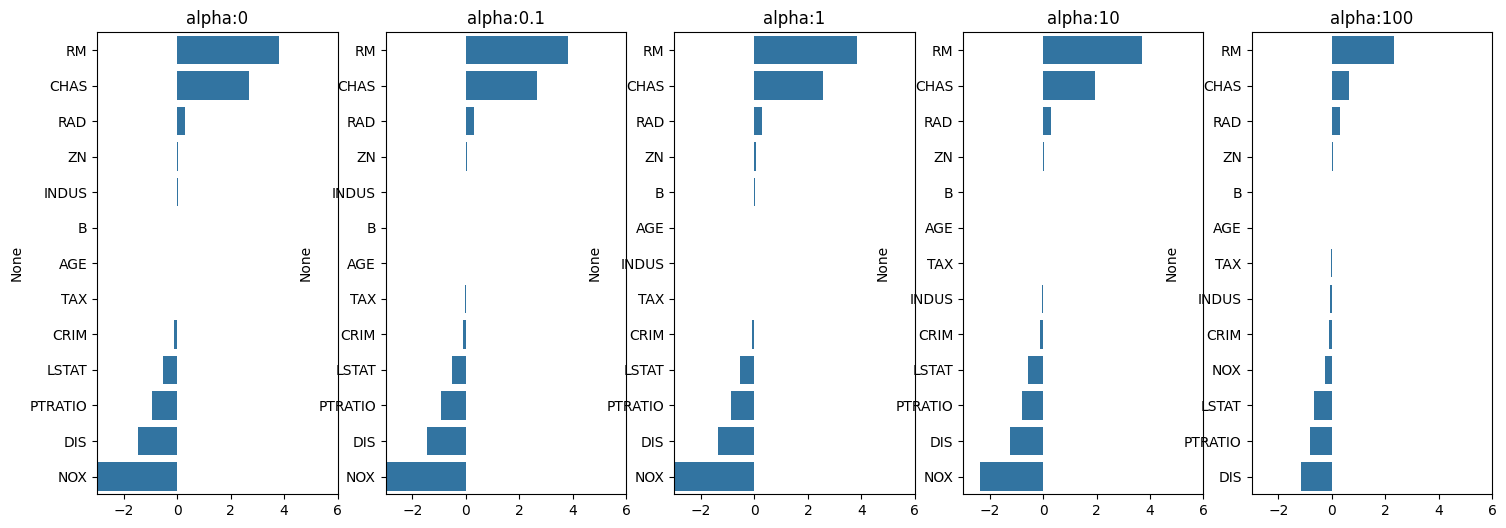

In [97]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
alphas = [0, 0.1, 1, 10, 100]

fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

선형 회귀 모델을 위한 데이터 변환
* 선형회귀모델과 같은 선형 모델은 일반적으로 특성과 타깃값 간에 선형 관계가 있다고 가정하고, 이러한 최적의 선형함수를 찾아내 결과값을 예측 
* 선형 회귀 모델은 피처값과 타깃값의 분포가 정규 분포 형태를 매우 선호합니다. 
* 타깃값의 경우 정규 분포 형태가 아니라 특정값의 분포가 치우진 왜곡(Skew)된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 존재합니다. 
* 특성값 역시 결정값보다는 덜 하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 수 있습니다. 
* 따라서 선형 회귀 모델은 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적입니다. 
* 하지만 이러한 스케일링/정규화 작업을 선행한다고 해서 무조건 예측 성능이 향상되는 것은 아닙니다. 
* 일반적으로 중요 특성들이나 타깃값의 분포도가 심하게 왜곡됐을 경우에 이러한 변환 작업을 수행합니다. 

#### StandardScaler 
* 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환

#### MinMaxScaler
* 최솟값이 0이고, 최댓값이 1인 값으로 정규화를 수행 



In [99]:
X_train_log_scaler = np.log1p(X_train)

In [100]:
from sklearn.linear_model import Lasso

In [101]:
lr_log = LinearRegression()

In [102]:
lr_log.fit(X_train_log_scaler, y_train)

LinearRegression()

In [103]:
y_preds_log = lr_log.predict(np.log1p(X_test))

In [104]:
y_preds_log

array([20.59982317, 20.23243505, 36.79411169, 18.29163985, 32.17631842,
       16.32893015, 27.48510523, 16.20237746, 11.47896035, 10.08358257,
       18.2093979 , 19.55489448, 28.46162816, 38.49508709, 21.40714506,
       22.92119297, 19.5599428 , 10.61926618, 31.65429269, 20.53894626,
       21.48199026, 15.13439016, 22.06469358, 16.64655105, 33.01106869,
       10.11124598, 10.03028395, 19.25519939, 13.3311447 , 11.2457179 ,
       27.27496838, 11.0611073 , 20.37162613, 22.98835559, 15.71644855,
       12.31350033, 14.41653007, 16.55069642, 17.65584697, 21.7118987 ,
       28.86699847,  9.68619284, 17.8956922 ,  3.95281854, 19.10568212,
       19.63815416, 29.44529671, 37.67241637, 16.73286598, 25.26881057,
       32.80771262, 38.92741765, 46.74411973, 16.90862816, 25.46975067,
       22.86755329, 17.75190609, 34.62783199, 22.6250879 , 12.5154999 ,
       22.37446872, 24.66555192, 23.27595175, 11.20160806, 19.65942202,
       43.81834018, 37.15602554, 29.66999049, 13.3028    , 20.78

In [106]:
np.sqrt(mean_squared_error(y_preds_log, y_test))

np.float64(3.871152499044405)

In [ ]:
for alpha in [0, 0.1, 1, 10, 100]:
    lasso = Lasso(alpha = alpha)
    #학습
    lasso.fit(X_train, y_train)
    print(ridge.score(X_test_scaler, y_test))

In [ ]:
#여러가지 모델을 전부 돌려봐야 어떤 모델이 제일 적합한지 확인할 수 있음 
#가장 적합한 모델이 무엇인지 찾아보는 방법론을 알아보자 (AutoML)